<a href="https://colab.research.google.com/github/o-Erebus/Dogs-and-Cats-CNN-Prediction-Model-/blob/main/Dogs%20and%20Cats%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading Dataset**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# **Traning Model**

##**Importing Libraries**

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,LeakyReLU
from keras.applications import VGG16,ResNet50,InceptionV3,MobileNetV2,EfficientNetB0
from keras import layers, models

## **Processing Images**

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## **Creating Model**

In [14]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in base_model.layers:
    layer.trainable = False


model = models.Sequential()
model.add(base_model)
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 conv2d_191 (Conv2D)         (None, 4, 4, 32)          589856    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_192 (Conv2D)         (None, 2, 2, 64)          18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 1, 1, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 1, 1, 128)        

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## **Being Training the Model**

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 88s 132ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0254 - val_accuracy: 0.9910
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.0413 - val_accuracy: 0.9902
Epoch 3/10
625/625 [==============================] - 75s 120ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0326 - val_accuracy: 0.9924
Epoch 4/10
625/625 [==============================] - 81s 129ms/step - loss: 0.0140 - accuracy: 0.9949 - val_loss: 0.0483 - val_accuracy: 0.9896
Epoch 5/10
625/625 [==============================] - 75s 120ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0606 - val_accuracy: 0.9900
Epoch 6/10
625/625 [==============================] - 81s 129ms/step - loss: 0.0078 - accuracy: 0.9969 - val_loss: 0.0601 - val_accuracy: 0.9914
Epoch 7/10
625/625 [==============================] - 81s 129ms/step - loss: 0.0151 - accuracy: 0.9962 - val_loss: 0.0589 - val_ac

## **Ploting Graphs to Visualize the Results**

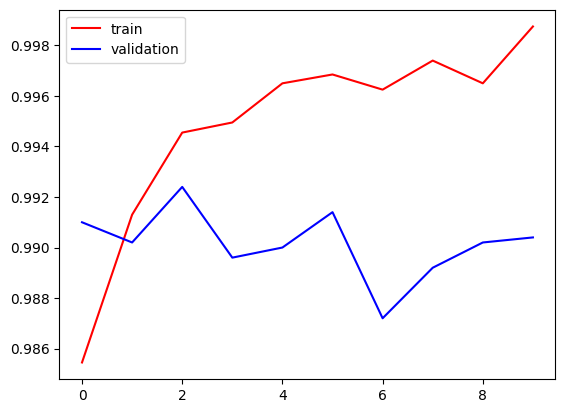

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

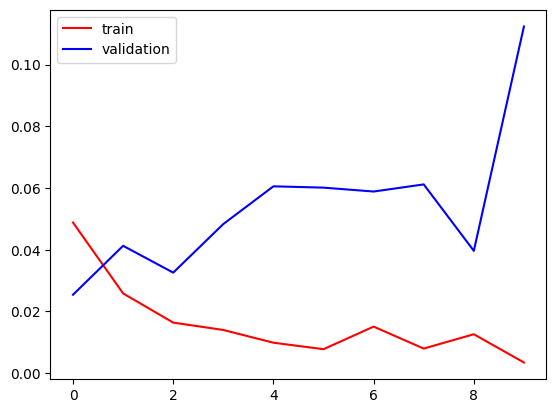

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## **Testing the Model**

1/1 [==============================] - 2s 2s/step


array([[1.]], dtype=float32)

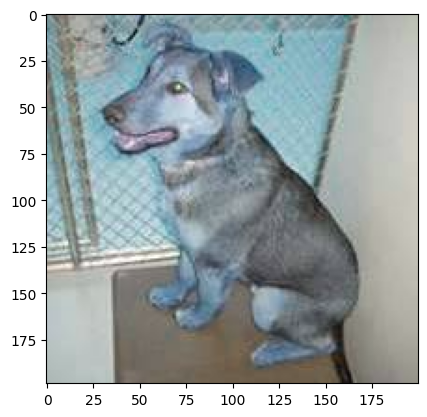

In [21]:
import cv2
test_img = cv2.imread('/content/test/dogs/dog.1002.jpg')
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)